<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Machine-learning-in-Football/blob/main/Shots_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/data_shots_processed.pkl?raw=true
!wget https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/data_shots.pkl?raw=true

--2021-03-04 15:42:04--  https://github.com/Dinesh-Adhithya-H/sports-analytics/blob/master/data_shots_processed.pkl?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Dinesh-Adhithya-H/sports-analytics/raw/master/data_shots_processed.pkl [following]
--2021-03-04 15:42:04--  https://github.com/Dinesh-Adhithya-H/sports-analytics/raw/master/data_shots_processed.pkl
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Dinesh-Adhithya-H/sports-analytics/master/data_shots_processed.pkl [following]
--2021-03-04 15:42:04--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/sports-analytics/master/data_shots_processed.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting

In [ ]:
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDClassifier,LogisticRegression,SGDRegressor,LogisticRegression
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve

In [ ]:
data1=pd.read_pickle("./data_shots.pkl?raw=true")

In [ ]:
data1=data1.drop(["pass_height","pass_length","play_pattern","pass_start_location","pass_location_x","pass_location_y","players_home","players_away","location","end_location"],axis=1)

In [ ]:
data1

,statsbomb_xg,body_part,play_type,outcome,technique,no_opponent,no_teammate,location_x,location_y
0,0.033683,Right Foot,Open Play,Blocked,Normal,0,0,98.1,52.1
1,0.023530,Left Foot,Open Play,Blocked,Normal,2,0,96.6,51.5
2,0.034307,Head,Open Play,Off T,Normal,1,0,112.1,30.6
3,0.076005,Left Foot,Open Play,Blocked,Normal,0,0,104.5,41.1
4,0.026850,Right Foot,Open Play,Off T,Normal,1,0,111.7,58.7
...,...,...,...,...,...,...,...,...,...
14877,0.018859,Right Foot,Open Play,Off T,Normal,0,0,87.7,50.7
14878,0.032107,Head,Open Play,Saved to Post,Normal,0,0,107.2,42.3
14879,0.009793,Right Foot,Open Play,Blocked,Normal,0,0,82.5,26.1
14880,0.434140,Right Foot,Open Play,Goal,Normal,0,0,108.0,33.7


In [ ]:
X=data1.copy()
for i in np.array(X[(X["body_part"] =="Left Foot") | (X["body_part"] =="Right Foot")].index):
  X["body_part"][i]="Leg"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X

,statsbomb_xg,body_part,play_type,outcome,technique,no_opponent,no_teammate,location_x,location_y
0,0.033683,Leg,Open Play,Blocked,Normal,0,0,98.1,52.1
1,0.023530,Leg,Open Play,Blocked,Normal,2,0,96.6,51.5
2,0.034307,Head,Open Play,Off T,Normal,1,0,112.1,30.6
3,0.076005,Leg,Open Play,Blocked,Normal,0,0,104.5,41.1
4,0.026850,Leg,Open Play,Off T,Normal,1,0,111.7,58.7
...,...,...,...,...,...,...,...,...,...
14877,0.018859,Leg,Open Play,Off T,Normal,0,0,87.7,50.7
14878,0.032107,Head,Open Play,Saved to Post,Normal,0,0,107.2,42.3
14879,0.009793,Leg,Open Play,Blocked,Normal,0,0,82.5,26.1
14880,0.434140,Leg,Open Play,Goal,Normal,0,0,108.0,33.7


In [ ]:
d1=X[["body_part","technique"]]

In [ ]:
y_goal=[]
goal_index=[]
not_goal_index=[]
y=[]
for i in X["outcome"].index:
  if X["outcome"].loc[i]=="Goal":
    goal_index.append(i)
    y.append(1)
  else:
    not_goal_index.append(i)
    y.append(0)

In [ ]:
X=X.drop(["play_type","outcome"],axis=1)

In [ ]:
len(goal_index),len(not_goal_index)

(1767, 13115)

In [ ]:
index=goal_index+not_goal_index[:12000]

In [ ]:
len(index)

13767

In [ ]:
d1

,body_part,technique
0,Leg,Normal
1,Leg,Normal
2,Head,Normal
3,Leg,Normal
4,Leg,Normal
...,...,...
14877,Leg,Normal
14878,Head,Normal
14879,Leg,Normal
14880,Leg,Normal


In [ ]:
# one-hot encoding 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0,1])], 
                                      remainder='drop') 
d11 =columnTransformer.fit_transform(d1)
D11=d11.todense()
D11=np.array(D11)
D=pd.DataFrame(D11)
X=pd.concat([X,D], axis=1)

In [ ]:
X

,statsbomb_xg,body_part,technique,no_opponent,no_teammate,location_x,location_y,0,1,2,3,4,5,6,7,8,9
0,0.033683,Leg,Normal,0,0,98.1,52.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.023530,Leg,Normal,2,0,96.6,51.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.034307,Head,Normal,1,0,112.1,30.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.076005,Leg,Normal,0,0,104.5,41.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.026850,Leg,Normal,1,0,111.7,58.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14877,0.018859,Leg,Normal,0,0,87.7,50.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14878,0.032107,Head,Normal,0,0,107.2,42.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14879,0.009793,Leg,Normal,0,0,82.5,26.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14880,0.434140,Leg,Normal,0,0,108.0,33.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X=X.drop(["body_part","technique"],axis=1)

In [ ]:
X=X.iloc[index]

In [ ]:
X

,statsbomb_xg,no_opponent,no_teammate,location_x,location_y,0,1,2,3,4,5,6,7,8,9
13,0.022605,1,0,104.7,38.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,0.013965,0,0,90.2,58.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20,0.114334,2,0,105.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
22,0.028965,2,0,106.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29,0.151045,2,0,117.0,47.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,0.068944,1,0,106.0,29.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13640,0.050400,3,0,102.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13641,0.035362,1,0,96.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13643,0.235606,1,0,117.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
y=[]
for i in range(1767):
  y.append(1)
for i in range(12000):
  y.append(0)

In [ ]:
Statsbomb=X["statsbomb_xg"]

In [ ]:
Statsbomb

13       0.022605
17       0.013965
20       0.114334
22       0.028965
29       0.151045
           ...   
13639    0.068944
13640    0.050400
13641    0.035362
13643    0.235606
13644    0.064226
Name: statsbomb_xg, Length: 13767, dtype: float64

In [ ]:
def s_angle(s_x, s_y):
    g1=np.array([120,36])
    g2=np.array([120,44])
    s=np.array([s_x,s_y])
    d1=s-g1
    d2=s-g2
    shot_angle = np.dot(s-g1,s-g2)/(np.sqrt(d1.dot(d1))*np.sqrt(d2.dot(d2)))
    return shot_angle

def s_dist(s_x, s_y):
    vectorised_shot = np.array([s_x,s_y])
    vectorised_goal = np.array([120,40])
    shot_dist =(vectorised_goal-vectorised_shot)
    shot_dist=np.dot(shot_dist,shot_dist)
    return shot_dist**0.5

In [ ]:
shot_distance=[]
shot_angle=[]
for i in range(len(index)):
  shot_distance.append(s_dist(X["location_x"].iloc[i],X["location_y"].iloc[i]))
  shot_angle.append(s_angle(X["location_x"].iloc[i],X["location_y"].iloc[i]))
X["shot_angle"]=shot_angle
X["shot_distance"]=shot_distance

In [ ]:
X=X.drop(["statsbomb_xg"],axis=1)

In [ ]:
X

,no_opponent,no_teammate,location_x,location_y,0,1,2,3,4,5,6,7,8,9,shot_angle,shot_distance
13,1,0,104.7,38.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.875439,15.417522
17,0,0,90.2,58.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.981378,35.128336
20,2,0,105.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.882353,15.524175
22,2,0,106.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.928477,17.204651
29,2,0,117.0,47.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.868243,7.615773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,1,0,106.0,29.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.937222,17.804494
13640,3,0,102.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.937807,20.124612
13641,1,0,96.0,15.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.987127,34.655447
13643,1,0,117.0,31.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.951223,9.486833


In [ ]:
x=MinMaxScaler().fit_transform(X)

In [ ]:
len(x)

13767

In [ ]:
s=Statsbomb.iloc[:14882]

In [ ]:
from sklearn.utils import shuffle
x,y,index= shuffle(x,y,index,random_state=69)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

# Linear models

In [ ]:
lr=LinearRegression().fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred = lr.predict(x_train)
y_train_xg=data1['statsbomb_xg'].iloc[index]
y_train_xg=y_train_xg[:3534]
x,y,z=roc_curve(y_train,y_train_pred)
#x1,y1,z1=roc_curve(y_train,y_train_xg)

0.34980847997572817
4325


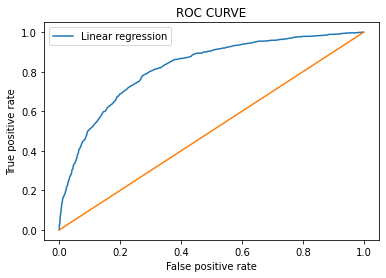

In [ ]:
plt.plot(x,y,label="Linear regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

In [ ]:
roc_auc_score(y_train,y_train_pred)#,roc_auc_score(y_train,y_train_xg)

0.8212209604612339

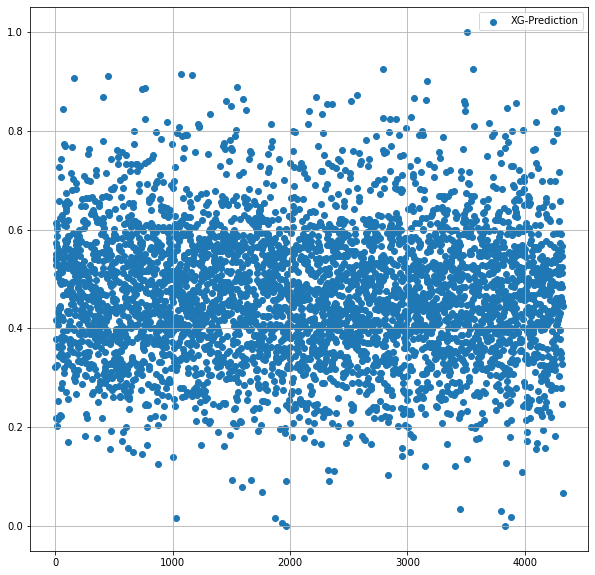

In [ ]:
plt.figure(figsize=(10,10))
y_train_pred=MinMaxScaler().fit_transform(y_train_pred.reshape(-1,1))
#y_train_pred=y_train_pred.reshape(11161)
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg-y_train_pred,label="XG-Prediction")
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="XG-Prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
#plt.scatter(y_train_xg,y_train_pred)
plt.legend()
plt.grid()
plt.show()

In [ ]:
np.mean(y_train_xg),np.mean(y_train_pred)

(0.1368436242383982, 0.46815240055955865)

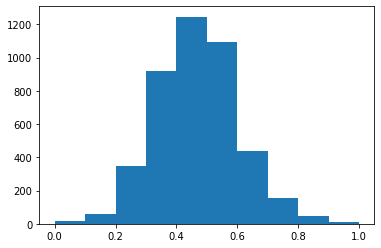

In [ ]:
plt.hist(y_train_pred)
plt.show()

In [ ]:
sgd=SGDRegressor().fit(x_train,y_train)
print(np.mean(np.abs(sgd.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred = sgd.predict(x_train)
#y_train_xg=data1['statsbomb_xg'].iloc[index]
#y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred)
#x1,y1,z1=roc_curve(y_train,y_train_xg)

0.3687536752371451
4325


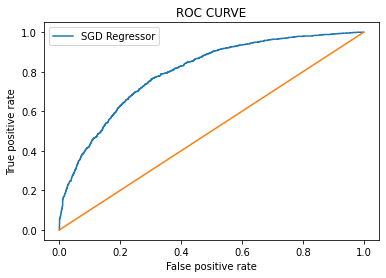

In [ ]:
plt.plot(x,y,label="SGD Regressor")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

[15:55:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3232461513948837
4325


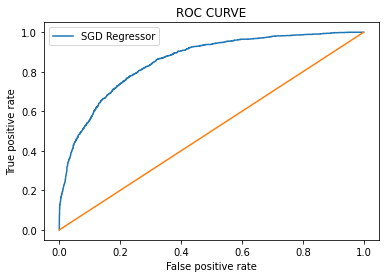

In [ ]:
sgd=XGBRegressor().fit(x_train,y_train)
print(np.mean(np.abs(sgd.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred = sgd.predict(x_train)
#y_train_xg=data1['statsbomb_xg'].iloc[index]
#y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred)
#x1,y1,z1=roc_curve(y_train,y_train_xg)
plt.plot(x,y,label="SGD Regressor")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

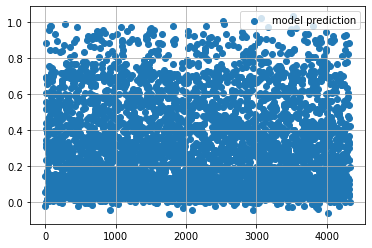

In [ ]:
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#plt.scatter(y_train_xg,y_train_pred)

# KNN 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnreg=KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)
print(np.mean(np.abs(knnreg.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred =knnreg.predict(x_train)
#y_train_xg=data1['statsbomb_xg'].iloc[index]
#y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred)
#x1,y1,z1=roc_curve(y_train,y_train_xg)

0.31678224687933426
4325


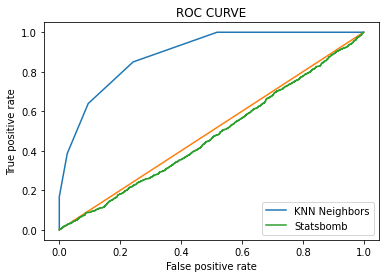

In [ ]:
plt.plot(x,y,label="KNN Neighbors")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

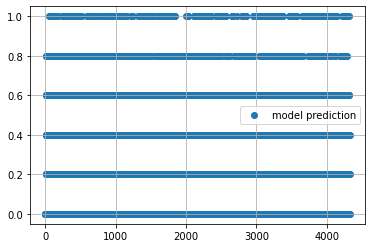

In [ ]:
plt.scatter(np.arange(len(y_train_pred)),y_train_pred,label="model prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

# Logistic Regression

In [ ]:
lr=LogisticRegression(C=1000).fit(x_train,y_train)
print(np.mean(np.abs(lr.predict(x_test)-y_test)))
print(len(x_train))
y_train_pred =lr.predict_proba(x_train)
#y_train_xg=data1['statsbomb_xg'].iloc[index]
#y_train_xg=y_train_xg[:2650]
x,y,z=roc_curve(y_train,y_train_pred[:,1])
#x1,y1,z1=roc_curve(y_train,y_train_xg)

0.2510402219140083
4325


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


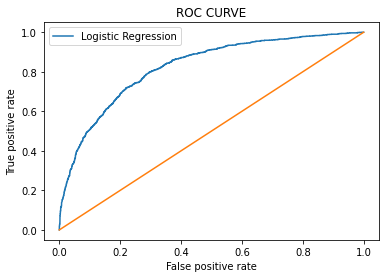

In [ ]:
plt.plot(x,y,label="Logistic Regression")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

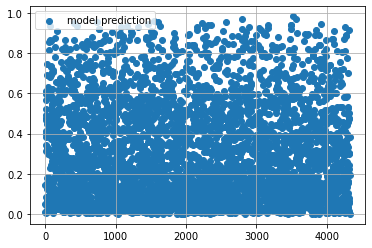

In [ ]:
plt.scatter(np.arange(len(y_train_pred)),y_train_pred[:,1],label="model prediction")
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

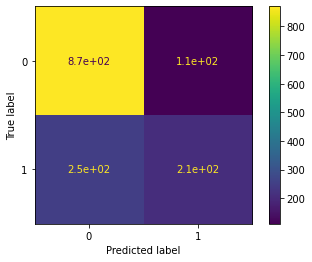

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,x_test,y_test)
plt.show()

# SVC

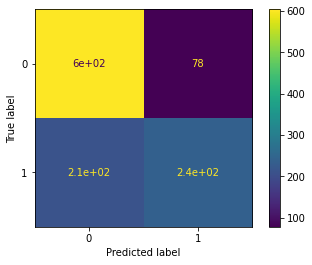

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",C=100.0).fit(x_train,y_train)
plot_confusion_matrix(svc,x_test,y_test)

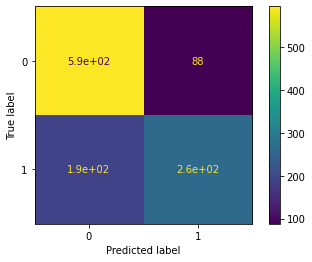

In [ ]:
from sklearn.svm import SVC
svc_rbf=SVC(kernel="rbf",C=100.0).fit(x_train,y_train)
plot_confusion_matrix(svc_rbf,x_test,y_test)

# Decision tree classifier

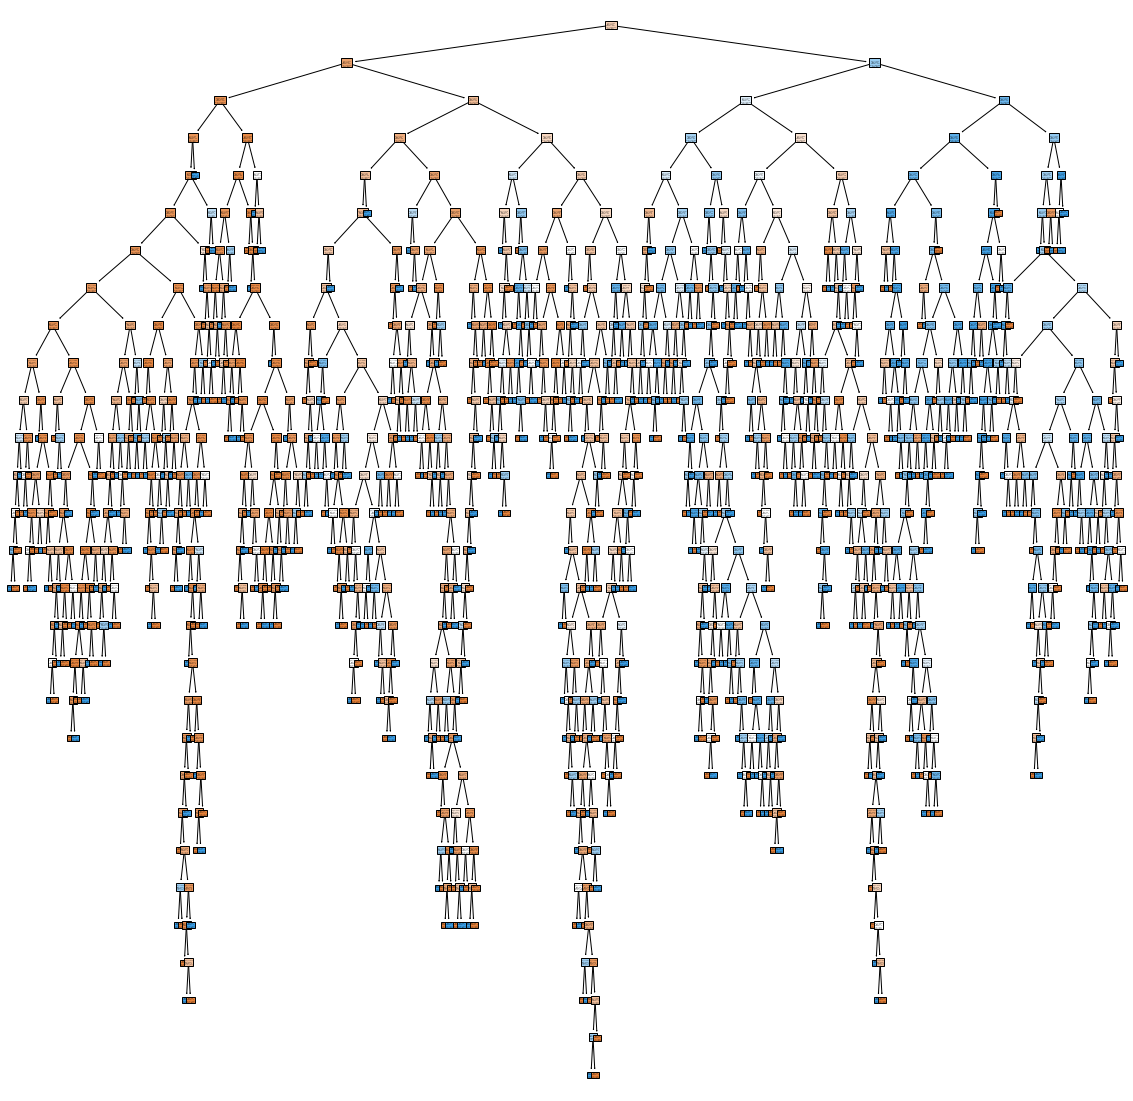

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc=DecisionTreeClassifier().fit(x_train,y_train)
plt.figure(figsize=(20,20))
tree.plot_tree(dtc,class_names=["miss","goal"],filled=True)
plt.show()

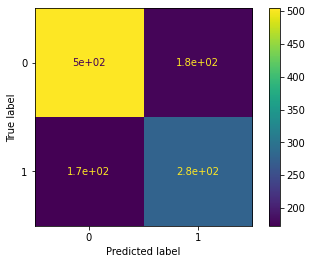

In [ ]:
plot_confusion_matrix(dtc,x_test,y_test)

# Deep Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(1028,input_shape=x_train[0].shape,activation="relu"),
  keras.layers.Dropout(0.05),
  keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1208,activation="relu"),
  keras.layers.Dropout(0.05),
  keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1208,activation="relu"),
  keras.layers.Dropout(0.05),
  keras.layers.BatchNormalization(),
  #tf.keras.layers.Dense(1208,activation="relu"),
  #keras.layers.Dropout(0.05),
  #keras.layers.BatchNormalization(),
  #tf.keras.layers.Dense(1208,activation="relu"),
  #keras.layers.Dropout(0.3),
  #keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(optimizer=keras.optimizers.Adam(lr=0.005, decay=5e-4),loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1028)              17476     
_________________________________________________________________
dropout_26 (Dropout)         (None, 1028)              0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 1028)              4112      
_________________________________________________________________
dense_37 (Dense)             (None, 1208)              1243032   
_________________________________________________________________
dropout_27 (Dropout)         (None, 1208)              0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 1208)              4832      
_________________________________________________________________
dense_38 (Dense)             (None, 1208)            

In [ ]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
model.fit(x_train,y_train,epochs=10,batch_size=10,validation_data=(x_test,y_test))

Epoch 1/10
1033/1033 [==============================] - 28s 26ms/step - loss: 0.8368 - accuracy: 0.7975 - val_loss: 0.4210 - val_accuracy: 0.8730
Epoch 2/10
1033/1033 [==============================] - 27s 26ms/step - loss: 0.4457 - accuracy: 0.8453 - val_loss: 0.4747 - val_accuracy: 0.8335
Epoch 3/10
1033/1033 [==============================] - 27s 26ms/step - loss: 0.3869 - accuracy: 0.8623 - val_loss: 0.3432 - val_accuracy: 0.8748
Epoch 4/10
1033/1033 [==============================] - 26s 26ms/step - loss: 0.3680 - accuracy: 0.8702 - val_loss: 0.3257 - val_accuracy: 0.8786
Epoch 5/10
1033/1033 [==============================] - 27s 26ms/step - loss: 0.3561 - accuracy: 0.8687 - val_loss: 0.3311 - val_accuracy: 0.8797
Epoch 6/10
1033/1033 [==============================] - 27s 26ms/step - loss: 0.3641 - accuracy: 0.8671 - val_loss: 0.3242 - val_accuracy: 0.8832
Epoch 7/10
1033/1033 [==============================] - 27s 26ms/step - loss: 0.3498 - accuracy: 0.8686 - val_loss: 0.3275 -

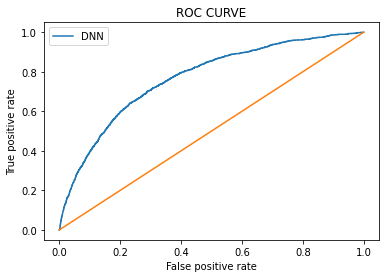

In [ ]:
y_train_pred =model.predict(x_train)
#y_train_xg=Statsbomb[len(x_train):]
x,y,z=roc_curve(y_train,y_train_pred[:,1])
#x1,y1,z1=roc_curve(y_train,y_train_xg)
plt.plot(x,y,label="DNN")
plt.plot([0,1],[0,1])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
#plt.plot(x1,y1,label="Statsbomb")
plt.title("ROC CURVE")
plt.legend()
plt.show()

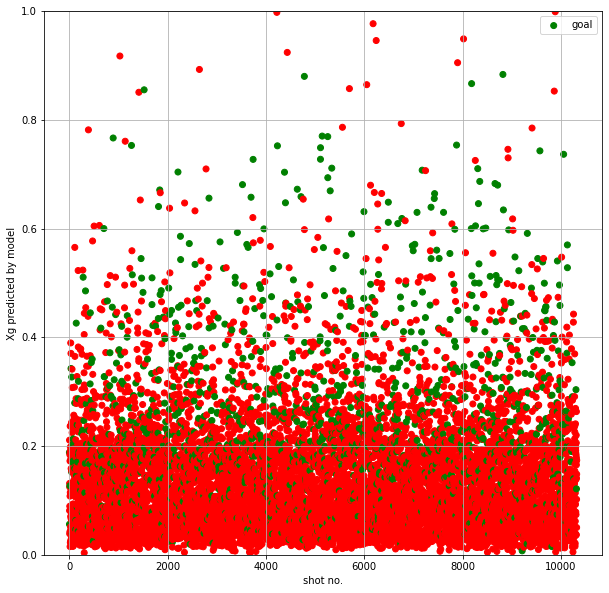

In [ ]:
plt.figure(figsize=(10,10))
plt.ylim(0,1)
plt.xlabel("shot no.")
plt.ylabel("Xg predicted by model")
color = ['green' if y_train[x]>0.5 else 'red' for x in range(len(y_train))]
plt.scatter(np.arange(len(y_train_pred)),y_train_pred[:,1].reshape(-1,1),label="goal",c=color)
#plt.scatter(np.arange(len(y_train_pred)),y_train_xg,label="Statsbomb")
plt.legend()
plt.grid()
plt.show()

In [ ]:
len(x_train)

10325

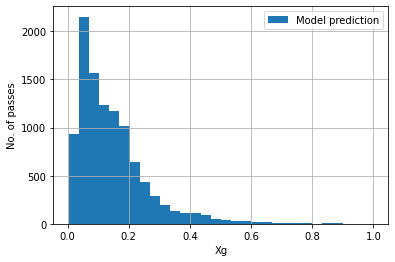

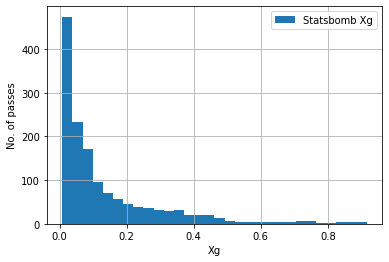

In [ ]:
plt.hist(y_train_pred[:,1],bins=30,label="Model prediction")
plt.xlabel("Xg")
plt.ylabel("No. of passes")
plt.grid()
plt.legend()
plt.show()
plt.hist(y_train_xg,bins=30,label="Statsbomb Xg")
plt.xlabel("Xg")
plt.ylabel("No. of passes")
plt.grid()
plt.legend()
plt.show()

In [ ]:
np.mean(abs(s))

0.11195284196526524

In [ ]:
np.mean(abs(model.predict(x_test)[:,1]-y_test))

0.20688777379577958

In [ ]:
np.mean(abs(model.predict(x_train)[:,1]))

0.14519286